<h4 align="right">by <a href="http://cs-people.bu.edu/usmn/"> Ben Usman</a> <br> with help of Kate Saenko, <br> Brian Kulis and Kun He <br> </h4>
# Problem Set 1 


## Preamble

To run and solve this assignment, one must have a working IPython Notebook installation. The easiest way to set it up for both Windows and Linux is to install [Anaconda](https://www.continuum.io/downloads). Then save this file ([`pset1.ipynb`](https://gist.githubusercontent.com/MInner/eb6330a655a5c37b82e15d1c84fd4cd0/raw/)) to your computer, run Anaconda and choose this file in Anaconda's file explorer. Use `Python 3` version. Below statements assume that you have already followed these instructions. If you are new to Python or its scientific library, Numpy, there are some nice tutorials [here](https://www.learnpython.org/) and [here](http://www.scipy-lectures.org/).

To run code in a cell or to render [Markdown](https://en.wikipedia.org/wiki/Markdown)+[LaTeX](https://en.wikipedia.org/wiki/LaTeX) press `Ctr+Enter` or `[>|]` button above. To edit any code or text cell [double]click on its content. To change cell type, choose "Markdown" or "Code" in the drop-down menu above.

We highly encourage students to put down their derivations into corresponding cells below. However, if one does not know LaTeX (and would find it too hard to learn it by looking at examples listed below between \$..\$), he or she might pass it in pen-and-paper format, however grading of these submissions might be delayed.

Put your solution into boxes marked with **`[double click here to add a solution]`** and press Ctr+Enter to render text. [Double]click on a cell to edit or to see its source code. You can add cells via **`+`** sign at the top left corner.

Submission instructions: please upload your completed solution file to Blackboard by the due date (see Schedule). If you have pen-and-paper answers, please hand them in in class on the same day. 

`Vector` stands for `column vector` below. Show all steps when proving statements.

### Problem 1: Closed-Form Maximum Likelihood

Assume that we are given $n$ iid samples $(x_1, ..., x_n)$ from __each__ $P(x \ | \ \theta)$ below. Compute the maximum likelihood estimates (MLEs) for the parameter $\theta$ of given distributions. 

**Q1.1**: $P(x \ | \ \theta) = \theta e^{-\theta x}$ for $x \geq 0$

**Q1.2**: $P(x \ | \ \theta) = \frac{1}{\theta}$ for $ 0 \leq x \leq \theta$

** Q1.1 ** 
$$ \theta_{MLE} =argmax(\Sigma log(\theta e^{-\theta x_i}))$$
$$ = argmax(\Sigma (log\theta-\theta x_i))$$
Take the first derivative to find critical points:
$$ n/\theta - \Sigma x_i = 0$$
$$ \theta = 1/\mu_x$$
Take the second derivative to confirm they are the maxima:
$$ \frac{-n}{\theta^2} < 0$$
Therefore, $ \theta = 1/\mu_x$.

** Q1.2 ** 
$$ \theta_{MLE} = argmax(\Sigma (log1 - log\theta))$$
$$  =argmin(n log\theta)$$
Since $x \leq \theta$, and log function is monotoniclly increase, hence:
$$ \theta = x$$
Assuming $ x < \theta$ is true for all x observed, then $\theta = max(x_i), i \in ${1,2,3...n}

### Problem 2: Gradient for Maximum Likelihood Estimation

Sometimes, we can't find MLEs in closed-form, in this case, we can use an iterative scheme to solve resulting optimization problem $\theta_{MLE} = \arg\max P(x \ | \ \theta)$. First-order iterative schemes (e.g. Gradient Descent, Stochastic Gradient Descent, Nesterov Accelerated Gradient Descent) require gradient information at each visited point. Compute gradients for log-likelihood of the following model:

- we have $X \in \mathbf R^{n \times k}$ - constant data matrix, $\mathbf x_i$ - vector corresponding to a single data point
- $\theta$ is a $k$-dimensional (unknown) weight vector
- $\varepsilon \sim \text{Student}(v)$ is a $n$-dimensional (unknown) noise vector
- and we observe vector $\mathbf y = X\theta + \varepsilon$

Which means that
$$ P(y_i \ | \ \mathbf x_i, \theta, v) = \frac{1}{Z(v)} \Big(1 + \frac{(\theta^T \mathbf x_i - y_i)^2}{v}\Big)^{-\frac{v+1}{2}}$$

where $Z$ stands for a normalization constant that does not depend on $\theta$, and $v$ is a constant parameter.

Denote log-likelihood as $\mathcal L(\theta)$ and log-likelihood for a single sample $i$ as $\mathcal L_i(\theta) = \mathcal L(\theta \ | \ \mathbf x_i, y_i)$.

**Q2.1**: Find $\frac{\partial \mathcal L_i(\theta)}{\partial \theta}$.

$$\frac{\partial \mathcal L_i(\theta)}{\partial \theta} = \frac{\partial}{\partial \theta} \Big[ log\Big(\frac{1}{Z(v)} \Big(1 + \frac{(\theta^T \mathbf x_i - y_i)^2}{v}\Big)^{-\frac{v+1}{2}}\Big) \Big]$$
$$= \frac{\partial}{\partial \theta} \Big[ log(\frac{1}{Z(v)}) - \frac{v+1}{2} * \log \Big(1 + \frac{(\theta^T \mathbf x_i - y_i)^2}{v} \Big) \Big] $$

$$= -\frac{\frac{v+1}{2} \frac{2}{v} \mathbf x_i (\theta^T \mathbf x_i - y_i)}{1+\frac{(\theta^T \mathbf x_i - y_i)^2}{v}}$$
$$= \frac{(v+1)(y_i \mathbf x_i -\mathbf x_i^T\theta\mathbf x_i)}{v+(\theta^T \mathbf x_i - y_i)^2}$$

The result is 1 by k vector.

**Q2.2**: Check the result obtained in the previous section by coding an SGD for $\mathcal L(\theta)$ and plotting how function value changes as a function of a number of passed gradient steps. Try multiple learning rates (1e-1, 1e-3, 1e-6), explain the result.

We marked places where you are expected to add/change your own code with **`## -- ! code required`** comment.

In [19]:
import numpy as np
from math import log
from matplotlib import pyplot as plt

def generate_data(n=100, k=10, v=4):
    X = np.random.rand(n, k)*2-1
    theta = np.random.rand(k, 1)
    noise = np.random.standard_t(4, n).reshape((-1, 1))
    return X, X @ theta + noise

def loss(X, y, theta):
    LL=0
    for i in range(X.shape[0]):
        LL -= log( (1+(((theta.T @ X[i:i+1,:].T)[0,0] - y[i])[0] **2 )/4) **(-2.5) )
    return LL

def loss_grad_i(X, y, theta, i):
    return ( -5*(y[i]*X[i:i+1,:]-X[i:i+1,:].dot(theta).dot(X[i:i+1,:])[0]) / (4+((theta.T @ X[i:i+1,:].T)[0,0]-y[i])**2)).T

def sgd_plot(theta_init, X, y, el, n_steps=100):
    theta = theta_init[:]
    losses = []
    for step_n in range(n_steps):
        for i in range(X.shape[0]):
            theta = theta - el*loss_grad_i(X, y, theta, i) 
            loss_i = loss(X, y, theta) 
            losses.append(loss_i)
    lastGrad = loss_grad_i(X, y, theta, i) 
    print('The L2 norm of the final gradient is:',str(np.linalg.norm(lastGrad)))
    plt.figure(figsize=(14,3))
    plt.plot(losses)
    plt.title('The learing rate is {}'.format(str(el)))
    plt.show()
    
def main(n, k, v, el): # el is learning rate
    np.random.seed(1)
    X, y = generate_data(n, k, v)
    theta_init = np.random.rand(k, 1)
    LL = sgd_plot(theta_init, X, y, el)
    return LL

The L2 norm of the final gradient is: 1.62235656791


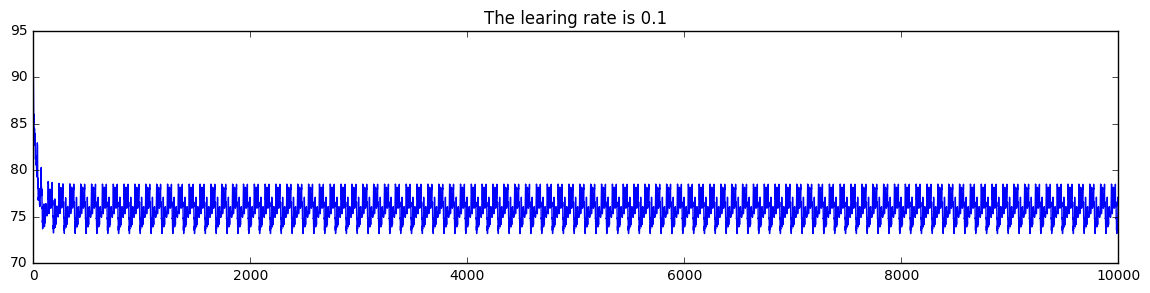

The L2 norm of the final gradient is: 1.64721228849


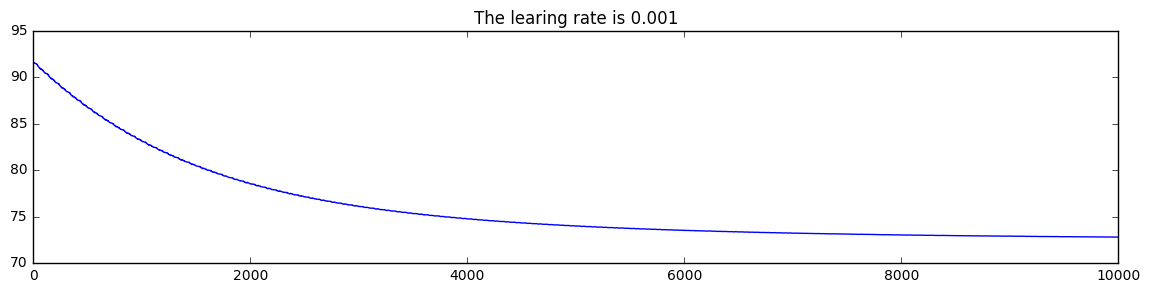

The L2 norm of the final gradient is: 1.87692247383


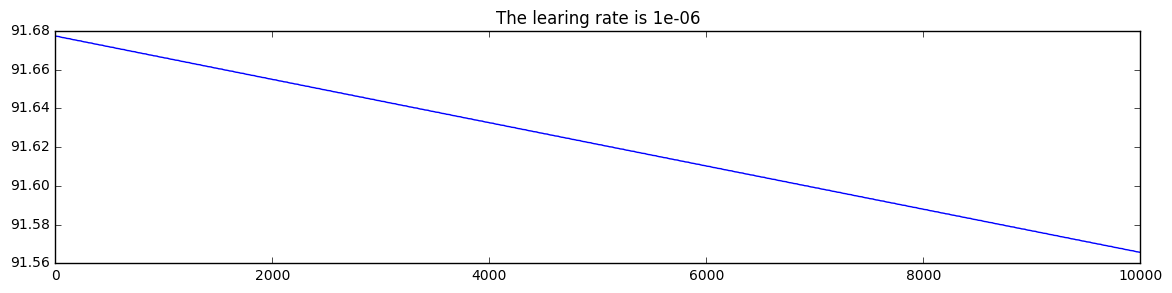


Time taken is 10.03378963470459 s


In [20]:
import time
s=time.time()

L1 = main(100,10,4,0.1)
L2 = main(100,10,4,0.001)
L3 = main(100,10,4,0.000001)
print()
print('Time taken is',str(time.time()-s),'s')

It is obviuos that with learning rate of 0.1, GD failed to find the minimum, instead, it bources back and forth near the true minimum.

With learning rate of 0.001, it sucessful converges at the minimum. 

If the learning rate is too small, loss decreases very slowly, it may eventually reach global minimum, but it takes significantly longer time.. 

### Problem 3: Matrix Derivatives

**Q3.1: Multivariate Gaussian **

Assume that our data is distributed according to [multivariate Gaussian](https://en.wikipedia.org/wiki/Multivariate_normal_distribution#Likelihood_function) with $\bar \mu$ mean and $\Sigma$ covariance matrix: $$(\mathbf x_1, \dots, \mathbf x_n) \sim \mathcal N(\bar \mu, \Sigma).$$ 

Using rules of [matrix derivatives](http://www2.imm.dtu.dk/pubdb/views/edoc_download.php/3274/pdf/imm3274.pdf) [51, 55], get a $\frac{\partial \mathcal L(\Sigma)}{\partial \Sigma}$ in matrix form.

$$ \frac{\partial \mathcal L(\Sigma)}{\partial \Sigma} = \sum_{i=1}^{n} \frac{\partial}{\partial \Sigma} \Big[-\frac{1}{2} log (det(\Sigma)) -\frac{1}{2} (\mathbf x_i - \mu)^T \Sigma^{-1} (\mathbf x_i - \mu) )  \Big]$$

$$ = -\frac{n}{2}(\Sigma^{-1})^T + \sum_{i=1}^{n}\Big(\frac{1}{2} (\Sigma^{-1})^{T}(\mathbf x_i - \mu)(\mathbf x_i - \mu)^T (\Sigma^{-1})^{T}\Big)$$

$$=\frac{(\Sigma^{-1})^T}{2} \Big( \sum_{i=1}^{n}(\mathbf x_i - \mu)(\mathbf x_i - \mu)^T \Sigma^{-1} -n \Big)$$

When $\frac{\partial \mathcal L(\Sigma)}{\partial \Sigma} =0$, $\Sigma=\frac{\sum_{i=1}^{n}(\mathbf x_i - \mu)(\mathbf x_i - \mu)^T}{n}$, and it is biased.

**Q3.2: Multi-target Linear Regression**
- we have $X \in \mathbf R^{n \times k}$ is a constant data matrix
- $\theta$ is a $k \times m$-dimentional weight matrix
- $\varepsilon_{ij} \sim \mathcal N(0, \sigma_\epsilon)$ is a normal noise ($i \in [0; n], j \in [0;m]$)
- and we observe a matrix $Y = X\theta + \varepsilon \in \mathbf R^{n \times m}$

$$\varepsilon = Y - X\theta \sim \mathcal N_n(0, \sigma_\epsilon I)$$

$$\mathcal L(\theta) = \log P(Y - X\theta \ | \ \theta) = \log \mathcal N_n(Y - X\theta \ | \ 0, \sigma_\epsilon I)$$

$$\theta_{MLE} = \arg \max_{\theta} \mathcal L(\theta) = \arg \min_{\theta} \big( ||Y-X\theta||^2_F \big)$$

In equations above $I$ stands for an identity matrix. Using rules of [matrix derivatives](http://www2.imm.dtu.dk/pubdb/views/edoc_download.php/3274/pdf/imm3274.pdf) [137, 132], show that:

**Q3.2.1:** $\frac{\partial\mathcal L(\theta)}{\partial \theta} = -2(Y-X\theta)^T X$

**Q3.2.2:** $\theta_{MLE} = (X^T X)^{-1} X^T Y$

**Hint:** in our case [see Matrix Cookbook, eq. 137], $g(U) = ||U||^2_F$ - squared Frobenius norm and $U(\theta) = f(\theta) = Y - \theta X$ - linear mapping.

** Answer to Q3.2.1 **

Notation: $i \in [0; n], j \in [0;m], l \in [0;k]$:

$$ \frac{\partial\mathcal L(\theta)}{\partial \theta_{lj}} =\frac{\partial}{\partial \theta_{lj}}\big( ||Y-X\theta||^2_F \big) = 2 Tr \Big((Y-X\theta)^T \frac{\partial (Y-X\theta)}{\partial \theta_{lj}} \Big) = -2 Tr \Big((Y-X\theta)^T \frac{\partial (X\theta-Y)}{\partial \theta_{lj}} \Big)$$

Assume $Y-X\theta$ = Z, Z$\in \mathbf R^{n \times m}$:
$$\frac{\partial\mathcal L(\theta)}{\partial \theta_{lj}} = -2 Tr \Big(Z^T \frac{\partial (X\theta-Y)}{\partial \theta_{lj}} \Big)$$


Since it is a dirivative of a single $\theta_{lj}$, the result will be a matrix same size of $X\theta, \in R^{n \times m}$ , but only with one culumn is non zero, and that column is $X_{il}$ repeated n times. Like this:

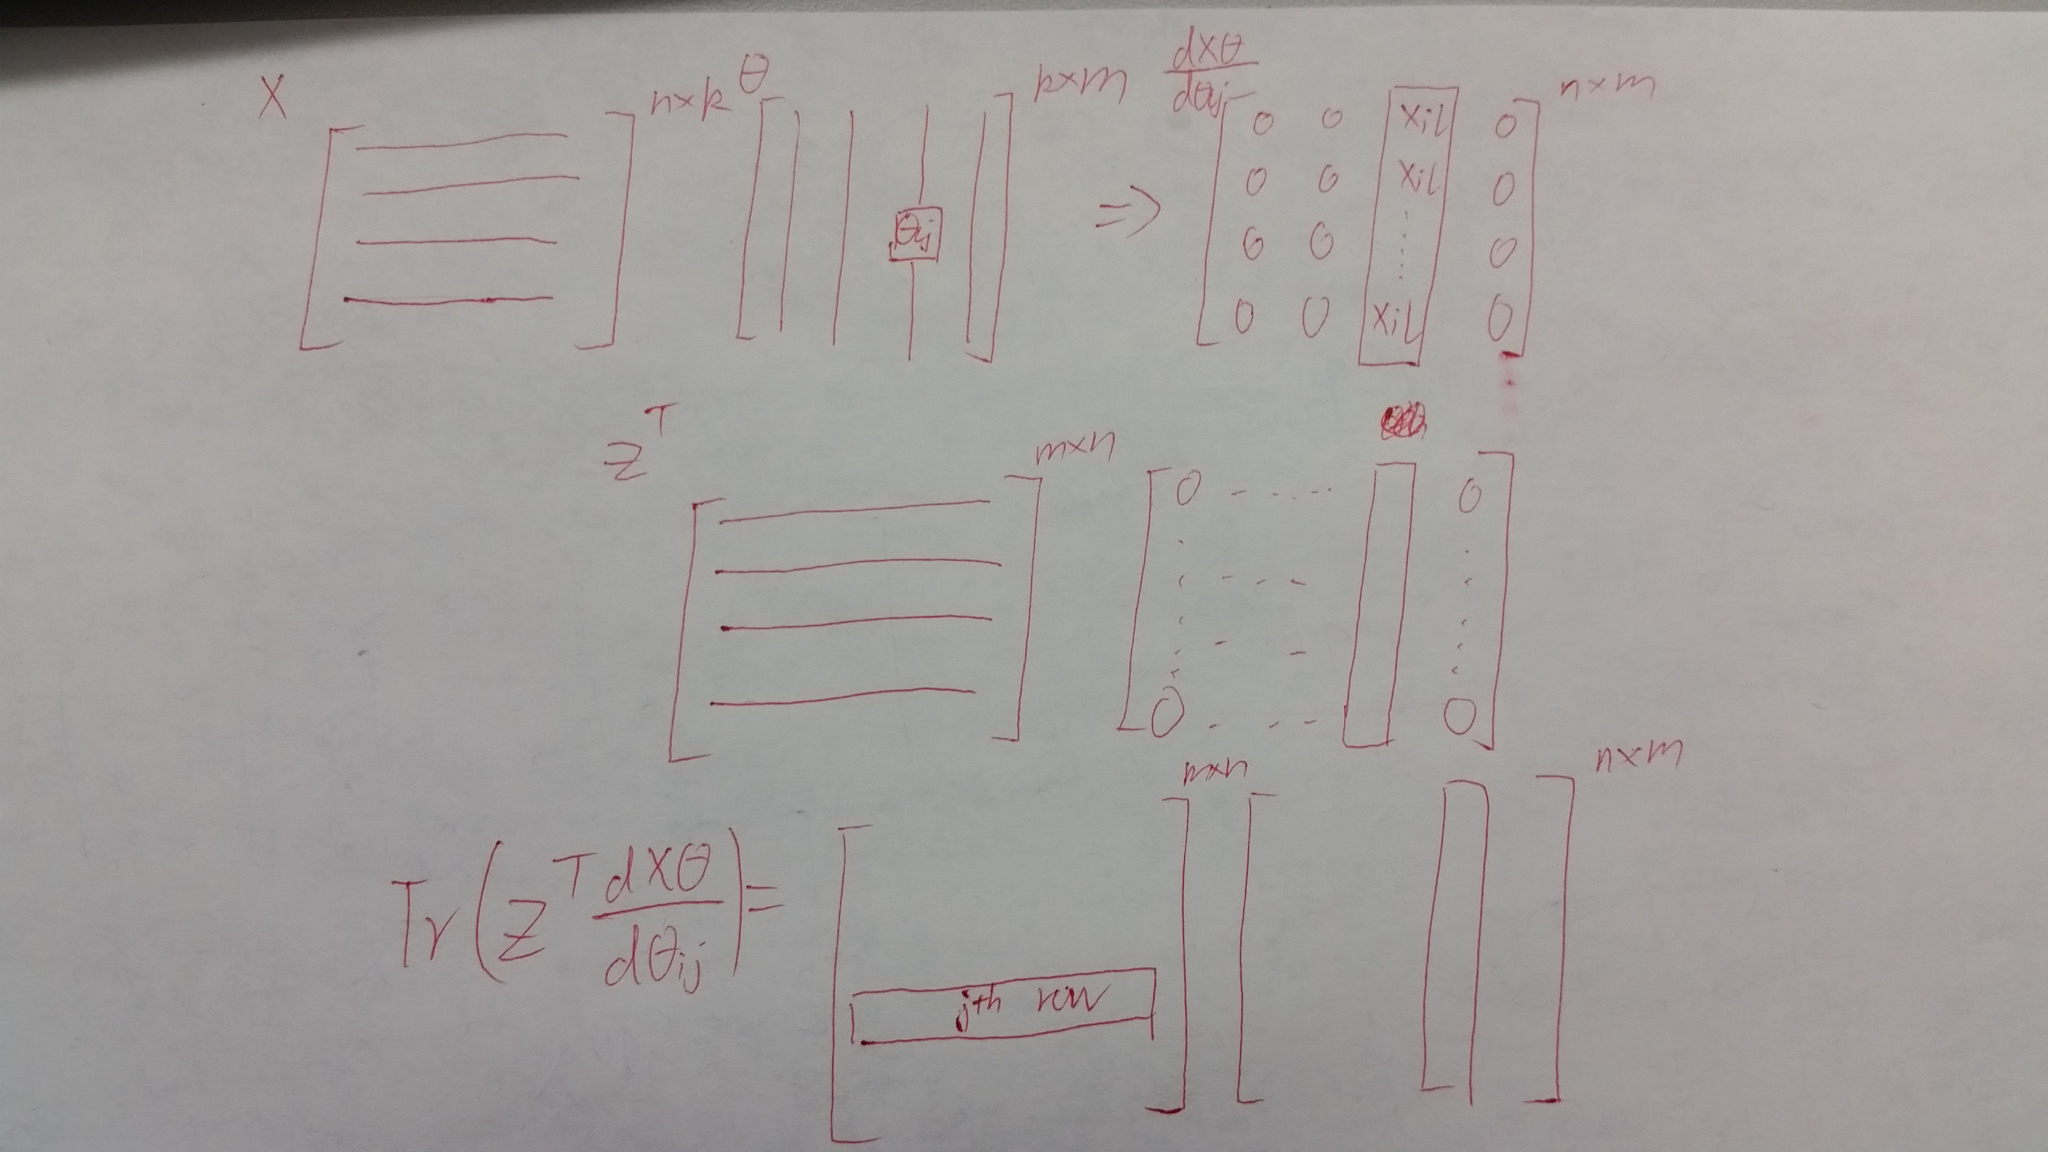

In [6]:
from IPython.display import Image
Image("20170201_191113.jpg", width=700)

Hence: 
$$\frac{\partial\mathcal L(\theta)}{\partial \theta_{lj}} = -2 Tr \Big(Z^T \frac{\partial (X\theta-Y)}{\partial \theta_{lj}} \Big) = -2 \sum_{i=1}^{n}Z_{\mathbf{j}i}*X_{i\mathbf{l}} $$
Therefore, for all entries in $\theta$, 
$$\frac{\partial\mathcal L(\theta)}{\partial \theta} =-2 Z^T X = -2(Y-X\theta)^T X$$

#### According to this [reference](http://www.atmos.washington.edu/~dennis/MatrixCalculus.pdf), in Proposition 8, the is the derivative of a matrix of size m x n is n x m.

** Answer to Q3.2.2 **

*** Method 1: ***

$\theta_{MLE}$ is when $\frac{\partial\mathcal L(\theta)}{\partial \theta} =0$, Then $ Y-X\theta = 0$
$$ X\theta=Y$$
$$X^T X \theta = X^T Y$$
$$ \theta=(X^T X)^{-1}X^T Y$$

*** Method 2: ***

$$(Y-X\theta)^T X = Y^T X - \theta^T X^T X=0$$
$$ Y^T X = \theta^T X^T X$$
$$\theta^T = Y^T X (X^T X)^{-1}$$
$$\theta = (X^T X)^{-T} X^T Y= (X^T X)^{-1} X^T Y$$

### Problem 4: Logistic Regression

Assume that we observe data generated via the following model:

- $X \in \mathbf R^{n \times k}$ - constant data matrix
- $\theta_j \sim \mathcal N(0, \sigma_\theta)$; $\theta$ is $k$-dimensional random vector
- $\varepsilon_i \sim \text{Logistic}(0, \sigma_\epsilon)$; $\varepsilon$ is $n$-dimensional random noise vector distributed according to [Logistic](https://en.wikipedia.org/wiki/Logistic_distribution) distribution
- and we observe $\mathbf y = \mathbf 1[X \theta + \varepsilon \geq 0]$ - boolean random vector

or, in other words: there exists some data $X$, we sample weights vector $\theta$ of the corresponding shape from multivariate normal distribution, multiply features from $X$ by weights from $\theta$, add random logistically distributed noise to resulting numbers, and observe whether resulting (noisy) random variable exceeds zero. So we are given the data matrix X and y, we want to estimate the weight vector $\theta$ as accurately as possible. 

Show that given model definition above, the following holds:

**Q4.1**: $ P(y_i = 1 \ | \ \theta, \mathbf x_i) = \text{logistic}(\theta^T \mathbf x_i)$

 where $ \text{logistic}(x) := \frac{1}{1+\exp(-x)}$ is a standard [logistic function](https://en.wikipedia.org/wiki/Logistic_function#Mathematical_properties), $\mathbf x_i$ denotes $i$-th data sample vector, $\mathbf 1[\dots]$ denotes indicator function
 
 **Hints:** 
 
 - use same principle as presented in previous problem: $\varepsilon = Y - X\theta \sim \mathcal N_n(0, \sigma_\epsilon) \Rightarrow P(Y - X\theta = a) = \mathcal N_n(a \ | \ 0, \sigma_\epsilon I) = \dots$
 - for an event $A$, what is $P(\mathbf 1[A] = 1)$ ? (answer: $P(A)$)
 - for a random variable $\zeta \sim P$ what is $P(\zeta \leq a)$ ? (answer: $F_{\zeta}(a)$ - value of cumulative density function for distribution of $\zeta$)

$$P(y_i = 1 \ | \ \theta, \mathbf x_i) =P(\theta^T x_i + \varepsilon \geq 0) =  P(\varepsilon \geq -\theta^T x_i) $$
Since $\varepsilon$ has mean of zeros, it is symetric, then:
$$= P(\varepsilon \leq -\theta^T x_i)$$
$$ =F\Big(-\theta^T x_i \Big)= \frac{1}{1+e^{-\frac{\theta^T x_i}{\sigma_\varepsilon}}} = logistic(\frac{\theta^T x_i}{\sigma_\varepsilon})$$

**Q4.1.1 (extra-bonus)**: How would you expect training loss to behave for large and small values of $\sigma_{\epsilon}$? Look at how does norm of the gradient for points that are removed from spearation plane ($|\theta^T \mathbf x_i| \gg 0$) changes with $\sigma_{\epsilon}$?

When $\theta$ is small, logistic function raises sharply, vise versa. 

**Q4.2**: $ P(y_i \ | \ \theta, \mathbf x_i) = (\text{logistic}(\theta^T \mathbf x_i))^{y_i} (1-\text{logistic}(\theta^T \mathbf x_i))^{(1-y_i)}$

This is a Bernouli distribution, with $ P(y_i = 1 \ | \ \theta, \mathbf x_i) = \text{logistic}(\theta^T \mathbf x_i)$, then:
$$$$
$$ P(y_i \ | \ \theta, \mathbf x_i) = (P(y_i = 1 \ | \ \theta, \mathbf x_i))^{y_i} (P(y_i = 0 \ | \ \theta, \mathbf x_i))^{(1-y_i)}$$
$$= (P(y_i = 1 \ | \ \theta, \mathbf x_i))^{y_i} (1- P(y_i = 1 \ | \ \theta, \mathbf x_i))^{(1-y_i)}$$
$$=(\text{logistic}(\theta^T \mathbf x_i))^{y_i} (1-\text{logistic}(\theta^T \mathbf x_i))^{(1-y_i)}$$

**Q4.3**: $ \log P(y_i \ | \ \theta, \mathbf x_i) = y_i \theta^T \mathbf x_i - \log(1 + \exp(\theta^T \mathbf x_i))$

$$ \log P(y_i \ | \ \theta, \mathbf x_i) =y_i log(\text{logistic}(\theta^T \mathbf x_i))+(1-y_i) log(1-\text{logistic}(\theta^T \mathbf x_i))$$
$$=y_i(\theta^T \mathbf x_i-log(1+e^{\theta^T \mathbf x_i}))+(1-y_i)log(\frac{1}{1+e^{\theta^T \mathbf x_i}})$$

$$=y_i(\theta^T \mathbf x_i-log(1+e^{\theta^T \mathbf x_i}))+(1-y_i)(0-log(1+e^{\theta^T \mathbf x_i})$$
$$= y_i \theta^T \mathbf x_i - \log(1 + \exp(\theta^T \mathbf x_i))$$

$$$$

The vector $\mathbf 1_{n \times 1}$ denotes column of ones.

**Q4.4**: $ \mathcal L_{MLE}(\theta) = \log P(\mathbf y \ | \ X, \theta) = y^T X \theta - \log(1 + \exp(X \theta)) \cdot \mathbf 1_{n \times 1}$

$$ \mathcal L_{MLE}(\theta) = \sum_{i=1}^{n}y_i \theta^T \mathbf x_i - \log(1 + \exp(\theta^T \mathbf x_i))$$
Since $y \in \mathbf R^{n \times 1}$,$X \in \mathbf R^{n \times k}$,$\Theta \in \mathbf R^{k \times 1}$, then $y^T X \theta \in \mathbf R^{1 \times 1}$ and $\log(1 + \exp(\theta^T \mathbf x_i))$ is a scalar, then for all n of $x_i$, it is $\log(1 + \exp(X \theta)), \in \mathbf R^{n \times 1}$. 

Hence, in order to get $\sum_{i=1}^{n}\log(1 + \exp(\theta^T \mathbf x_i))$, we can time it with a vector of ones. Therefore:
$$$$
$$\mathcal L_{MLE}(\theta) = \log P(\mathbf y \ | \ X, \theta) = y^T X \theta - \mathbf 1_{1 \times n}  \cdot  \log(1 + \exp(X \theta))$$

This is a different representation of the equation we asked to proven in the question, I altered to make sure $\mathcal L_{MLE}(\theta)$ is a scalar.


$$$$

**Q4.5**: One way of estimating true weight vector $\theta$ is by finding an MLE estimate. To make use of prior information,  one might want to find [maximum a posteriori estimation](https://en.wikipedia.org/wiki/Maximum_a_posteriori_estimation) (MAP) that can be derived from likelihood $P(X|\theta)$ and prior $P(\theta)$ over weights as following (Bayes rule):

$$ \theta_{MAP} = \arg\max_\theta P(\theta | X) = \arg\max_\theta \frac{P(X|\theta)P(\theta)}{\int_{\Theta} P(X|\theta)P(\theta) d \theta} = \arg\max_\theta \big[ \log P(X|\theta) + \log P(\theta) - \log \int_{\Theta} P(X|\theta)P(\theta) d \theta \big] \\ = \arg\max_\theta \big[ \log P(X|\theta) + \log P(\theta) \big] $$

In the model definition above, normal prior over weights is specified by line $\theta_j \sim \mathcal N(0, \sigma_\theta)$, which essentially means that "weight vector components should not be too far from zero".

$\mathcal L_{MAP}(\theta) = \log P(\theta \ | \ X, \mathbf y) = y^T X \theta - \log(1 + \exp(X \theta)) \cdot \mathbf 1_{n \times 1} - \lambda \ ||\theta||^2_2 $, $\lambda = \frac{1}{2\sigma_\theta^2}$

$$log(P(\theta)) = \sum_{i=1}^{n} log(\mathcal N(\theta_i; 0, \sigma_\theta)$$
$$=\sum_{i=1}^{n} \Big[log(\sqrt{\frac{1}{2\pi\sigma_{\theta}}})-\frac{\theta_i^2}{2\sigma_{\theta}} \Big]$$
$$=n log(\sqrt{\frac{1}{2\pi\sigma_{\theta}}})-\lambda ||\theta||^2_2 , \lambda = \frac{1}{2\sigma_\theta}$$
When performing differenciation, the constant term $n log(\sqrt{\frac{1}{2\pi\sigma_{\theta}}})$ will disappear, So we can set it to zero here as well. Therefore:
$$\mathcal L_{MAP}(\theta) = \log P(\theta \ | \ X, \mathbf y) = y^T X \theta - \log(1 + \exp(X \theta)) \cdot \mathbf 1^T_{n \times 1} - \lambda \ ||\theta||^2_2 ,\lambda = \frac{1}{2\sigma_\theta^2}$$

$$$$

**Q4.6**: $\frac{\partial \mathcal L_{MAP}(\theta)}{\partial \theta} = X^T(y - \text{logistic}(X\theta))) - 2 \lambda \theta $

Since $\frac{\partial A \theta}{\partial \theta} = A^T$, as shown in __Q.3.2__ then:

$$\frac{\partial \mathcal L_{MAP}(\theta)}{\partial \theta} = X^Ty - \frac{X^T \exp(X \theta)}{1 + \exp(X \theta)} - 2 \lambda \theta = = X^Ty - \frac{X^T}{1 + \exp(-X \theta)} - 2 \lambda \theta$$
$$ =X^T(y - \text{logistic}(X\theta))) - 2 \lambda \theta $$

$$$$

The prior part of the likelihood ($||\theta||_2^2$) may also be interpreted as [Tikhonov regularizer](https://en.wikipedia.org/wiki/Tikhonov_regularization). When the problem is ill-posed, it might have multiple solutions, and regularizer lets us define which of them is more preferable ("with the smaller L2 norm - in our case") by modifying loss, and as a result, letting an iterative scheme converge better.

**Q4.7**: What does $\lambda$ stand for?

$\lambda$ controls how much the weight should be close to zero.

### Problem 5: Coding Logistic Regression

**Don't be scared by the size of the coding part!** If you find my code below horribly disgusting or amazingly incomprehensible (underscore one) and don't want to read it, you can skip most parts that do not have **`## ! -- code required`** comment in them and just execute the rest without reading. However, I highly encourage you not to do so, to fully dive into the Zen of Python Plotting (a very useful skill!). Some bonuses and my personal respect will be granted to those who will tweak the plotting code in the coolest way or show intersting extra results.

Here's the code that generates data according to model specification (**Problem 4**) and plots for `k_features=2`.

G:\Program Files\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


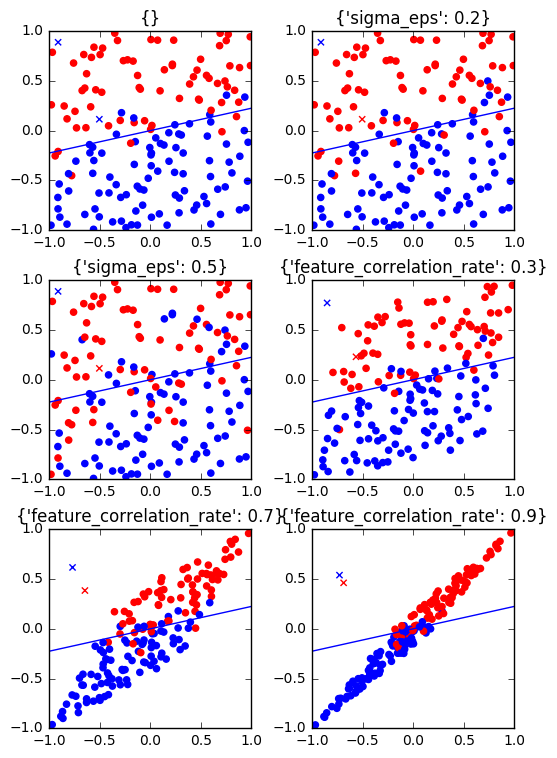

In [105]:
import numpy as np
import matplotlib.pyplot as plt

def generate_logistic_regression_data(n_samples=200, k_featues=2, sigma_eps=0.1, 
                                      sigma_theta=1, feature_correlation_rate=0, train_test_ratio=4):
    np.random.seed(2)
    X_noncorr = np.random.rand(n_samples, k_featues)*2-1 # [0, 1] -> [-1, 1] center around zero
    mixture_matrix = np.eye(k_featues)*(1-feature_correlation_rate) + feature_correlation_rate/k_featues
    X = X_noncorr @ mixture_matrix
    theta_real = np.random.normal(scale=sigma_theta, size=k_featues).reshape((-1, 1)) # column
    noise = np.random.logistic(scale=sigma_eps, size=n_samples).reshape((-1, 1))
    y = ((X @ theta_real + noise) > 0).astype(np.int16).reshape((-1, 1))
    split_idx = int(n_samples * train_test_ratio / (train_test_ratio + 1))
    return X[:split_idx, :], y[:split_idx], X[split_idx:, :], y[split_idx:], theta_real

def plot_2d_data(subfig, X, y, X_test, y_test, theta):
    subfig.scatter(X[:, 0], X[:, 1], color = [['r', 'b'][c] for c in np.ravel(y)])
    point_color_arr = [['r', 'b'][c] for c in np.ravel(y_test)]
    subfig.scatter(X_test[0], X_test[1], marker='x', color = point_color_arr)
    subfig.plot((1, -1), (-theta[0]/theta[1], theta[0]/theta[1]))
    subfig.set_xlim(-1, 1)
    subfig.set_ylim(-1, 1)
    
def subfig_iter(it, val_name=None, n_col=2, base_size=(6,1.5), title=None, fmt='%s'):
    n_rows = int(len(it)/n_col) + len(it) % n_col
    size = (base_size[0], base_size[1]*len(it))
    fig, _axes = plt.subplots(n_rows, n_col, figsize=size)
    for subfig, val in zip(np.ravel(_axes).tolist(), it): 
        yield (val, subfig)
        if val_name is not None:
            if val_name == '':
                subtitle = fmt % (val)
            else:
                subtitle = ('%s = '+fmt) % (val_name, val)
            subfig.set_title(subtitle)
            subfig.legend(loc='best')
    if title is not None:
        fig.suptitle(title, verticalalignment='top') 

def test_draw():
    data_args_dicts = [
        dict(), {'sigma_eps': 0.2}, {'sigma_eps': 0.5}, {'feature_correlation_rate': 0.3}, 
        {'feature_correlation_rate': 0.7}, {'feature_correlation_rate': 0.9},
    ]
    for arg_dict, subfig in subfig_iter(data_args_dicts, val_name=''):
        data = generate_logistic_regression_data(**arg_dict)
        X_train, y_train, X_test, y_test, theta_real = data
        plt.title(str(arg_dict), fontsize=2)
        plot_2d_data(subfig, X_train, y_train, X_test, y_test, theta_real)
    
    plt.subplots_adjust(wspace=0.3, hspace=0.25)
    plt.show()

test_draw()

#### **Q5.1.1**: When we use `feature_correlation_rate` ($\alpha$) the following happens: we construct a matrix $M$ that has values $1 - \frac{n-1}{n}\alpha$ on the diagonal and values $\frac{\alpha}{n}$ everywhere else. What happens to resulting matrix $MX$ if $\alpha$ is either 0 or 1?

In [91]:
n_samples=200
k_featues=2
sigma_eps=0.1 
sigma_theta=1 
feature_correlation_rate=0
train_test_ratio=4

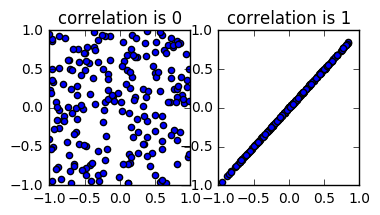

In [92]:
np.random.seed(1)
X_noncorr = np.random.rand(n_samples, k_featues)*2-1

fig, axes = plt.subplots(1, 2, figsize=(4, 2))
for i in range(2):
    mixture_matrix = np.eye(k_featues)*(1-i) + i/k_featues
    XX = X_noncorr @ mixture_matrix
    axes[i].scatter(XX[:,0],XX[:,1])
    axes[i].set_title('correlation is {}'.format(i))
    axes[i].set_xlim(-1,1)
    axes[i].set_ylim(-1,1)
plt.show()

If $\alpha = 0$, two features are uncorrelated. When $\alpha = 1$, they are completely correlated. 

$$$$

**Q5.1.2**: Explain what happens in this line (use `numpy` documentation to learn about [transposition](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.T.html), [broadcasting](https://docs.scipy.org/doc/numpy-dev/user/basics.broadcasting.html), [negative indices](https://docs.scipy.org/doc/numpy-dev/user/quickstart.html#automatic-reshaping) for reshaping and [newaxis](https://docs.scipy.org/doc/numpy/reference/arrays.indexing.html#basic-slicing-and-indexing))

    y = ((theta_real.T @ X + noise) > 0).astype(np.int16).reshape(-1, 1)

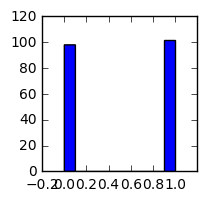

In [93]:
theta_real = np.random.normal(scale=sigma_theta, size=k_featues).reshape((-1, 1))
mixture_matrix = np.eye(k_featues)*(1-i) + i/k_featues
X = X_noncorr @ mixture_matrix
noise = np.random.logistic(scale=sigma_eps, size=n_samples).reshape((-1, 1))
y = ((X @ theta_real + noise) > 0).astype(np.int16).reshape((-1, 1))

plt.figure(figsize=(2,2))
plt.hist(y)
plt.xlim(-0.2,1.2)
plt.show()

As shown above, it assignes each data point with label of 0 or 1.

Reshape is to change the shape of the vector from (100,) to (100,1).

np.int16 is to speed up the calculation.

**Q5.1.3**: Why do we plot line $( (1, -\frac{\theta_0}{\theta_1}) ; (-1, \frac{\theta_0}{\theta_1}))$?

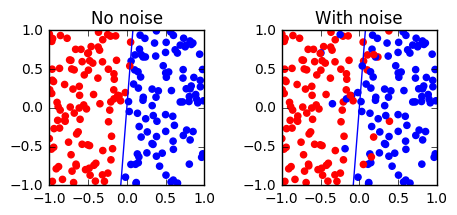

In [95]:
y0 = ((X @ theta_real) > 0).astype(np.int16).reshape((-1, 1))
y1 = ((X @ theta_real + noise) > 0).astype(np.int16).reshape((-1, 1))
mixture_matrix = np.eye(k_featues)*(1-0) + 0/k_featues
X = X_noncorr @ mixture_matrix
fig,axes=plt.subplots(1,2,figsize=(5,2))
[d.plot((1, -1), (-theta_real[0]/theta_real[1], theta_real[0]/theta_real[1])) for d in axes]
[d.set_xlim(-1, 1) for d in axes]
[d.set_ylim(-1, 1) for d in axes]
axes[0].scatter(X[:, 0], X[:, 1], color = [['r', 'b'][c] for c in np.ravel(y0)])
axes[0].set_title('No noise')
axes[1].scatter(X[:, 0], X[:, 1], color = [['r', 'b'][c] for c in np.ravel(y1)])
axes[1].set_title('With noise')
plt.subplots_adjust(wspace=0.5)
plt.show()

It shows the effect of noise on data points. Without noise, I should two classes should be perfectly linear seperateble. 

**Q5.2**: Why did we implement $\text{softplus}(x) = \log(1+\exp(x))$ as shown below? What is numerical under- and overflow and how people deal with it?

In [96]:
import numpy as np
from matplotlib import pyplot as plt

def softplus(x_, limit=5):
    x = np.array(x_)
    compute_real_mask = np.logical_and(-limit < x, x < limit)
    return_same_mask = x >= limit
    computed_real_part = np.log(1 + np.exp(x*compute_real_mask)*compute_real_mask)
    returned_same_part = x*return_same_mask
    return computed_real_part + returned_same_part

def test_softplus():
    x_arr = np.linspace(-200, 200)
    softplus_true = np.log(1 + np.exp(x_arr))
    softplus_stable = softplus(x_arr)
    assert np.max(abs(softplus_true-softplus_stable)) < 1e-3
    
test_softplus()

def logistic(x):
    return 1/(1+np.exp(-x))

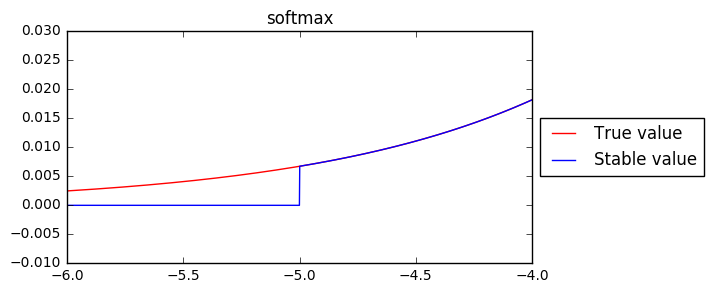

In [97]:
x=np.linspace(-7, 7,num=10000)
plt.figure(figsize=(6,3))
plt.plot(x,np.log(1 + np.exp(x)),'r',label='True value')
softplus_true = np.log(1 + np.exp(x))
compute_real_mask = np.logical_and(-5 < x, x < 5)
return_same_mask = x >= 5
computed_real_part = np.log(1 + np.exp(x*compute_real_mask)*compute_real_mask)
returned_same_part = x*return_same_mask
plt.plot(x,computed_real_part + returned_same_part,'b',label='Stable value')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5)) 
plt.ylim(-0.01,0.03); plt.xlim(-6,-4)
plt.title('softmax')
plt.show()

$$ \mathcal L_{MLE}(\theta) = \log P(\mathbf y \ | \ X, \theta) = y^T X \theta - \log(1 + \exp(X \theta)) \cdot \mathbf 1_{n \times 1}$$
$$\frac{\partial \mathcal L_{MAP}(\theta)}{\partial \theta} =X^T(y - \text{logistic}(X\theta)))$$

As shown above, underflow will set the output of logistic function to zero when input is smaller than -5. this is troublesome in some case.

Quote form the textbook about definition about underflow and overflow:
> One form of rounding error that is particularly devastating is underﬂow. Under-
> ﬂow occurs when numbers near zero are rounded to zero. Many functions behave
> qualitatively diﬀerently when their argument is zero rather than a small positive
> number.

> Another highly damaging form of numerical error is overﬂow. Overﬂow occurs
> when numbers with large magnitude are approximated as ∞ or −∞



**Q5.3**: Write (by filling in the missing code below) Gradient Descent and Stochastic Gradient Descent algorithm for the MAP loss and plot 

- MAP loss
- L2 distance between current theta and true one
- cosine distance between current theta and true one

use results from **Q4.6, Q4.7**. Note that our loss is $loss(\theta) = -\mathcal L(\theta)$ and it is usually referred as "the negative log-likelihood".

In [98]:
from numpy.linalg import norm
from scipy.spatial.distance import cosine
import matplotlib.cm as cm

def logistic_MAP_loss(X, y, theta_current, lambd):
    loss = 0
    for i in range(X.shape[0]):
        loss -= y[i:i+1,0]*(theta_current.T @ X[i:i+1,:].T) - np.log(1+np.exp(theta_current.T @ X[i:i+1,:].T))
#     loss = -y.T @ X @ theta_current + np.log(np.ones((X.shape[0],1)) + np.exp(X @ theta_current)).T * np.ones((X.shape[0],1)) \
#         + (theta_current.T @ theta_current) * lambd
    return loss - lambd * np.linalg.norm(theta_current)

def logistic_MAP_loss_gradient(X, y, theta_current, lambd):
    grad = -X.T @ (y - logistic(X @ theta_current)) + 2 * lambd * theta_current
    return grad

def logistic_MAP_loss_single_gradient(X, y, smaple_id, theta_current, lambd):
    x_i = X[smaple_id].reshape((1, -1))
    y_i = y[smaple_id].reshape((1, 1))
    return logistic_MAP_loss_gradient(x_i, y_i, theta_current, lambd)

def logistic_classification_accuracy(X, y, theta_current):
    return 0 ## ! -- code required

def run_MAP_gd(X, y, lambd, learning_rate = 0.01, max_epoch_n=200, init_theta=None):
    theta = init_theta if init_theta is not None else np.ones((X.shape[1], 1))*5
    steps = []
    for epoch_n in range(max_epoch_n):
        theta = theta- learning_rate * logistic_MAP_loss_gradient(X, y, theta, lambd)
        steps.append(theta)
    return steps

def run_MAP_sgd(X, y, lambd, learning_rate = 0.01, max_epoch_n=200, init_theta=None):
    theta = init_theta if init_theta is not None else np.ones((X.shape[1], 1))*5
    steps = []
    for epoch_n in range(max_epoch_n):
        for smaple_id in range(X.shape[0]):
            theta = theta - learning_rate * logistic_MAP_loss_single_gradient(X, y, smaple_id, theta, lambd)
        steps.append(theta)
    return steps

gd runtime: 1.2815200646418816
sgd runtime: 3.061860944555974


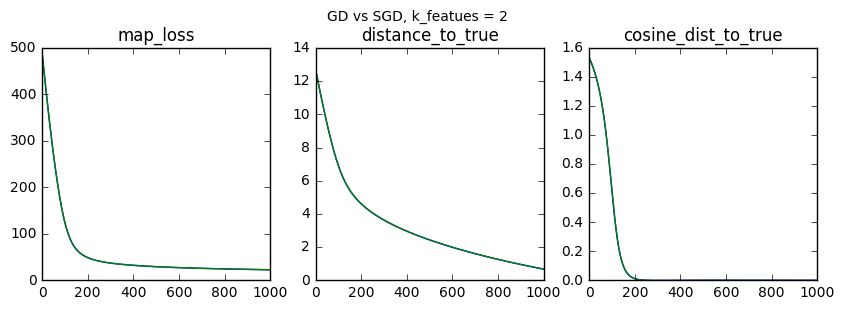

gd runtime: 1.3111182431921407
sgd runtime: 3.2021099213125126


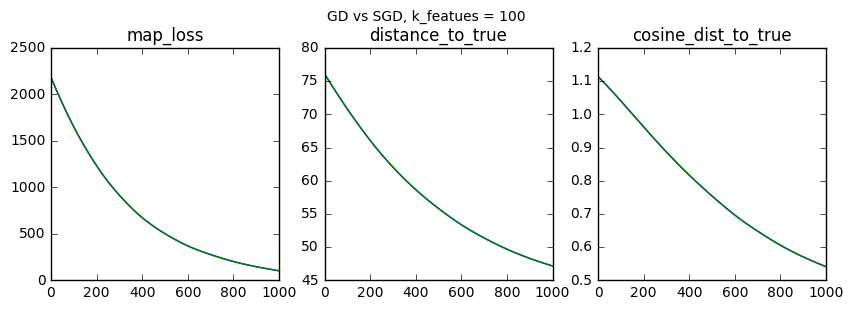

In [109]:
import time

def draw_gd_plots(axes, theta_steps, X, y, lambd, theta_real):
    collected_val_dicts = []
    for theta in theta_steps:
        collected_val_dicts.append({
                'distance_to_true': np.linalg.norm(theta-theta_real),
                'cosine_dist_to_true': cosine(theta, theta_real),
                'map_loss': float(logistic_MAP_loss(X, y, theta, lambd)),
            })
        
    
    for plot_id, key in enumerate(collected_val_dicts[0].keys()):
        subfig = axes[plot_id]
        subfig.set_title(key)
        subfig.plot(list(d[key] for d in collected_val_dicts))

def main():
    for k_featues in [2, 100]:
        data_args = {'n_samples': 200, 'k_featues': k_featues, 'sigma_eps': 0.3, 
                     'sigma_theta': 5, 'feature_correlation_rate': 0}
        data = generate_logistic_regression_data(**data_args)
        X_train, y_train, X_test, y_test, theta_real = data
        fig, axes = plt.subplots(1, 3, figsize=(10,3))
        lamdb = 0
        
        now = time.clock()
        steps = run_MAP_gd(X_train, y_train, lamdb, learning_rate=1e-3, max_epoch_n=1000)
        draw_gd_plots(axes, steps, X_train, y_train, lamdb, theta_real)
        print('gd runtime:', time.clock() - now)
        
        now = time.clock()
        steps = run_MAP_sgd(X_train, y_train, lamdb, learning_rate=1e-3, max_epoch_n=1000)
        draw_gd_plots(axes, steps, X_train, y_train, lamdb, theta_real)
        fig.suptitle('GD vs SGD, k_featues = %d' % k_featues, verticalalignment='bottom')
        print('sgd runtime:', time.clock() - now)
        
        plt.show()
    
main()

**Q5.3.1**: We expect loss to gradually decrease. Re-run code above several times (sgd might work differently). Explain plots above.

In some cases, the learning rate actually cause it to pass the 

**Q5.4**: Complete the provided code below, and use it to draw several contour plots of logistic loss with different regularization parameter. Explain your results.

[[ 1.63533519]
 [-7.27679722]]


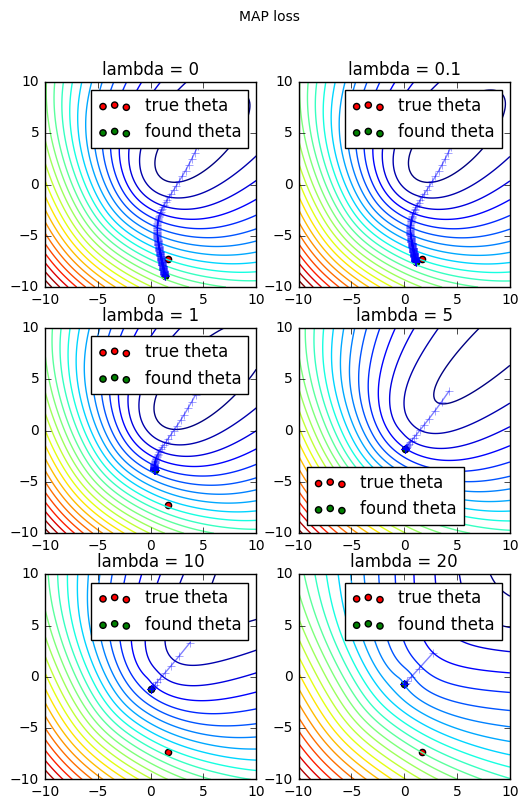

In [106]:
from itertools import product

def draw_f_contour(subfig, f, x_limits, n_lines=30, n=100):
    space = [np.linspace(*x_limit, n) for x_limit in x_limits]
    f_vals = np.array([f(np.array(v)) for v in product(*space)]).reshape(n, n).T
    subfig.set_xlim(*x_limits[0])
    subfig.set_ylim(*x_limits[1])
    subfig.contour(*space, f_vals, n_lines)
    
def draw_gd_steps(subfig, steps, func, theta_real):
    around_space = list([-10, 10] for coord in theta_real)
    draw_f_contour(subfig, func, around_space)
    subfig.plot(np.hstack(steps)[0], np.hstack(steps)[1], marker='+', alpha=0.5)
    subfig.scatter(*np.ravel(theta_real), c='r', label='true theta')
    theta_best = steps[-1]
    subfig.scatter(*np.ravel(theta_best), c='g', label='found theta') 
        
def main():
    data_args = dict(n_samples=200, k_featues=2, sigma_eps=0.1, sigma_theta=5)
    data = generate_logistic_regression_data(**data_args)
    X_train, y_train, X_test, y_test, theta_real = data
    print(theta_real)
    
    lambds = [0, 0.1, 1, 5, 10, 20]
    for lambd, subfig in subfig_iter(lambds, val_name='lambda', title='MAP loss'):
        steps = run_MAP_gd(X_train, y_train, lambd)
        draw_func = lambda theta: logistic_MAP_loss(X, y, theta, lambd)
        draw_gd_steps(subfig, steps, draw_func,theta_real)
    plt.show()

main()

**`[double click here to add a solution]`**

**Q5.5**: Using the provided code below, draw several contour plots of logistic loss with different number of used samples. Explain your results.

[[-3.33776716]
 [ 2.69237992]]


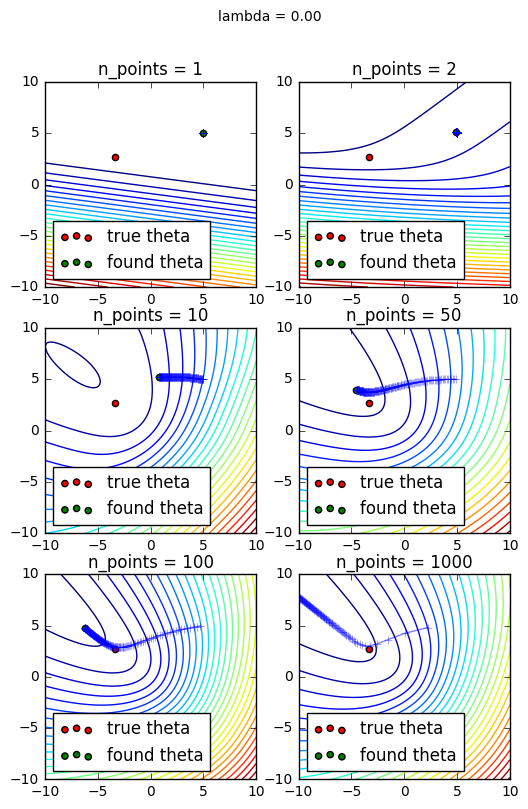

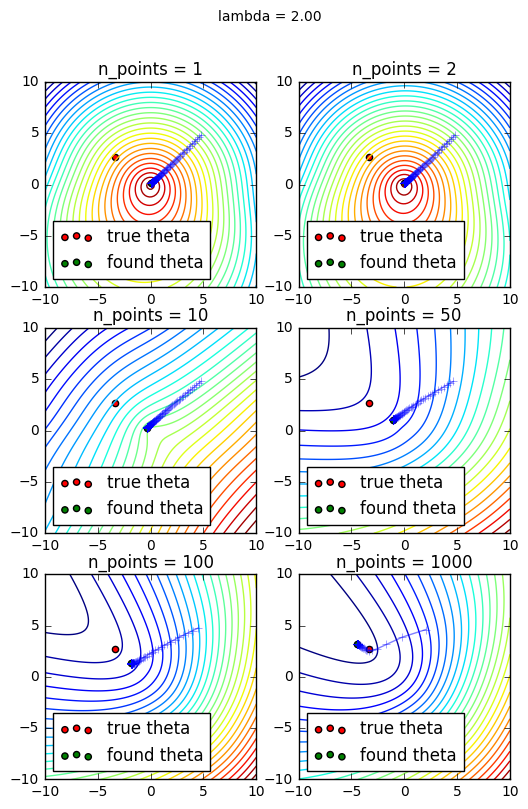

In [110]:
def main():
    data_args = dict(n_samples=1000, k_featues=2, sigma_eps=0.1, sigma_theta=3)
    data = generate_logistic_regression_data(**data_args)
    X_train, y_train, X_test, y_test, theta_real = data
    print(theta_real)

    for lambd in [0.0, 2.0]:    
        n_points_s = [1, 2, 10, 50, 100, 1000]
        figure_args = dict(val_name='n_points', title='lambda = %.2f' % lambd)
        for n_points, subfig in subfig_iter(n_points_s, **figure_args):
            cropped_xy = (X_train[:n_points], y_train[:n_points])
            steps = run_MAP_gd(*cropped_xy, lambd)
            draw_func = lambda th: logistic_MAP_loss(*cropped_xy, th, lambd)
            draw_gd_steps(subfig, steps, draw_func,theta_real)
        plt.show()
        
main()

**`[double click here to add a solution]`**

**Q5.6**: Using the provided code below, draw several contour plots of logistic loss with different degrees of feature interdependence. Explain your results.

[[ 1.63533519]
 [-7.27679722]]
[[ 1.63533519]
 [-7.27679722]]
[[ 1.63533519]
 [-7.27679722]]
[[ 1.63533519]
 [-7.27679722]]


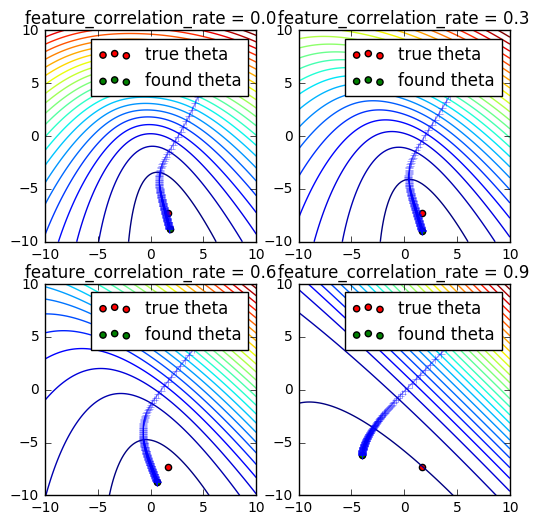

In [111]:
def main():
    rates = np.linspace(0, 0.9, 4)
    for feature_correlation_rate, subfig in subfig_iter(rates, val_name='feature_correlation_rate'):
        data_args['feature_correlation_rate'] = feature_correlation_rate
        data = generate_logistic_regression_data(**data_args)
        X_train, y_train, X_test, y_test, theta_real = data
        print(theta_real)
        steps = run_MAP_gd(X_train, y_train, 0)
        draw_func = lambda th: logistic_MAP_loss(X_train, y_train, th, 0)
        draw_gd_steps(subfig, steps, draw_func,theta_real)
    plt.show()

main()

**`[double click here to add a solution]`**

**Q5.7**: Using the provided code below, draw plots of train\test loss with different parameters. Explain your results.

In [17]:
from collections import OrderedDict

def draw_losses():
    arg_ranges = OrderedDict([
        ('k_featues', np.linspace(10, 300, 40).astype(int)),
        ('n_samples', np.linspace(10, 300, 40).astype(int)),
        ('feature_correlation_rate', np.linspace(0, 1, 50).astype(float)),
        ('sigma_eps', np.linspace(0.01, 5, 50).astype(float)),
    ])

    k_range = [2, 100]
    l2_lambda = 0
    overall_iterator = subfig_iter(list(product(arg_ranges.items(), k_range)), n_col=2)
    for ((arg_name, arg_vals), k_featues_default), subfig in overall_iterator:
        collected_val_dics = []
        for arg_val in arg_vals:
            data_args = dict(n_samples=200, k_featues=k_featues_default, sigma_eps=0.1, 
                             sigma_theta=1, feature_correlation_rate=0, train_test_ratio=4)
            data_args.update({arg_name: arg_val})
            data = generate_logistic_regression_data(**data_args)
            X_train, y_train, X_test, y_test, theta_real = data
            init_theta = np.zeros((data_args['k_featues'], 1))
            
            gd_args = dict(max_epoch_n=100, init_theta=init_theta)
            steps = run_MAP_gd(X_train, y_train, l2_lambda, **gd_args)
            best_theta = steps[-1]
            
            train_acc = logistic_classification_accuracy(X_train, y_train, best_theta)
            test_acc = logistic_classification_accuracy(X_test, y_test, best_theta)
            collected_val_dics.append(
                OrderedDict([
                    ('train_acc', train_acc),
                    ('test_acc', test_acc)
                ]))

        for key, color in zip(collected_val_dics[0].keys(), ['b', 'g']):
            subfig.set_title('%s (k_featues_default = %s)'%(arg_name, k_featues_default))
            track_vals = list(d[key] for d in collected_val_dics)
            subfig.plot(arg_vals, track_vals, marker='.', label=key, color=color, alpha=0.1)
            ws = 7
            assert ws % 2 == 1
            half_ws = int((ws-1)/2)
            track_vals_avg = np.convolve(track_vals, np.ones(ws)/ws, mode='valid')
            plot_args = dict(color=color, label=key+'_avg')
            subfig.plot(arg_vals[half_ws:-half_ws], track_vals_avg, '--', **plot_args)
            subfig.set_ylim(0.4, 1.05)
            subfig.set_ylabel('accuracy')
    plt.show()

draw_losses()

**`[double click here to add a solution]`**